# Machine Learning Works With MNIST Dataset

The <code>MNIST (Modified National Institute of Standards and Technology)</code> dataset is a large dataset containing handwritten digits. It is widely used in the fields of machine learning and image processing, especially for training and testing of neural networks.

In this project, we will train some machine learning models and use some bootstrap on <code>MNIST</code> dataset. Firstly, let's call the datasets.

In [1]:
# call dataset
import pandas as pd
df_train = pd.read_csv('/home/mert/Desktop/Dersler/Veri Madenciliği/Proje/Ödev 2/mnist_train23.csv')
df_train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


As you can see above, our train dataset has been loaded. Our classification variable is <code>label</code>. We will learn it here and use it later in this project.

Let's continue with the load of test dataset.

In [2]:
# test dataset
df_test = pd.read_csv('/home/mert/Desktop/Dersler/Veri Madenciliği/Proje/Ödev 2/mnist_test23.csv')
df_test.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We are finished to create our dataset variables with <code>Pandas</code>. Right now, we will control our datas to preprocess them.

Let's control if there is any empty cells.

In [3]:
# null variable control
print('For our train dataset:\n{}'.format(df_train.isnull().sum()))
print('*******************')
print('For our test dataset:\n{}'.format(df_test.isnull().sum()))

For our train dataset:
label    0
1x1      0
1x2      0
1x3      0
1x4      0
        ..
28x24    0
28x25    0
28x26    0
28x27    0
28x28    0
Length: 785, dtype: int64
*******************
For our test dataset:
label    0
1x1      0
1x2      0
1x3      0
1x4      0
        ..
28x24    0
28x25    0
28x26    0
28x27    0
28x28    0
Length: 785, dtype: int64


Continue with descriptions of the dataset variables.

In [4]:
# train dataset description
df_train.describe()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,12089.000000,12089.0,12089.0,12089.0,12089.0,12089.0,12089.0,12089.0,12089.0,12089.0,...,12089.0,12089.0,12089.0,12089.0,12089.0,12089.0,12089.0,12089.0,12089.0,12089.0
mean,2.507155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.499969,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,3.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,3.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,3.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# test dataset description
df_test.describe()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,2042.000000,2042.0,2042.0,2042.0,2042.0,2042.0,2042.0,2042.0,2042.0,2042.0,...,2042.0,2042.0,2042.0,2042.0,2042.0,2042.0,2042.0,2042.0,2042.0,2042.0
mean,2.494613,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.500093,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,3.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,3.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Before <code>data preprocessing</code> part, let's take <code>info</code> of these variables.

In [6]:
# train dataset info
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12089 entries, 0 to 12088
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 72.4 MB


In [7]:
# test dataset info
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2042 entries, 0 to 2041
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 12.2 MB


We are done with investigating our dataset so far. We found no empty cell, and we gathered that all of our columns have <code>int64</code> type. It means that our work is easy in data preprocessing part. Let's continue.

## Data Preprocessing

Here, we will prepare our dataset to different machine learning processes. So, here is so important.

We will create our <code>x</code> and <code>y</code> variables right now -for both of train and test dataset. So, let's start.

In [8]:
# train datasets preprocessing
x_train_data = df_train.iloc[:, 1:]
y_train_data = df_train.iloc[:, 0]

print("x_train shape:", x_train_data.shape)
print("y_train shape:", y_train_data.shape)

x_train shape: (12089, 784)
y_train shape: (12089,)


In [9]:
# test datasets preprocessing
x_test_data = df_test.iloc[:, 1:]
y_test_data = df_test.iloc[:, 0]

print("x_train shape:", x_train_data.shape)
print("y_train shape:", y_train_data.shape)

x_train shape: (12089, 784)
y_train shape: (12089,)


We have done our data preprocessing part right now. Our data has been preprocessed and we can continue to the machine learning models part right now.

At start, we will train a <code>bagging classifier</code> with bootstrap.

## Bagging Classificator with Bootstrap

In this part of the project, we will train a <code>bagging classificator with 50-bootstrap</code>. Our base estimator will be <code>decision trees</code>.

First, let's import the requirements.

In [10]:
# imports
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

Let's create our classificator and control its accuracy.

In [11]:
# bagging classificator with decision trees
bag_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50,
                            bootstrap=True, max_samples=1.0, random_state=42)
bag_clf.fit(x_train_data, y_train_data)

# evaluate the accuracies
train_accuracy_bagging = accuracy_score(y_train_data, bag_clf.predict(x_train_data))
test_accuracy_bagging = accuracy_score(y_test_data, bag_clf.predict(x_test_data))

print(f"Train Accuracy: {train_accuracy_bagging:.3f}")
print(f"Test Accuracy: {test_accuracy_bagging:.3f}")

Train Accuracy: 1.000
Test Accuracy: 0.984


We have seen our high accuracies above. The percentages are high because we have lots of features in our dataset.

Right now, we will change our <code>n_estimators</code> values and show it in a graph. That's how we will find the best one.

In [12]:
bootstrap_values = [5, 10, 20, 50]
scores = []

for value in bootstrap_values:
    bag_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=value,
                               bootstrap=True, max_samples=1.0, random_state=42)
    bag_clf.fit(x_train_data, y_train_data)
    
    test_accuracy_bagging2 = accuracy_score(y_test_data, bag_clf.predict(x_test_data))
    scores.append(test_accuracy_bagging2)
    
print('Accuracies: ', scores)

Accuracies:  [0.9745347698334965, 0.9794319294809011, 0.9799216454456415, 0.9843290891283056]


Let's draw a <code>graph</code> for these accuracies.

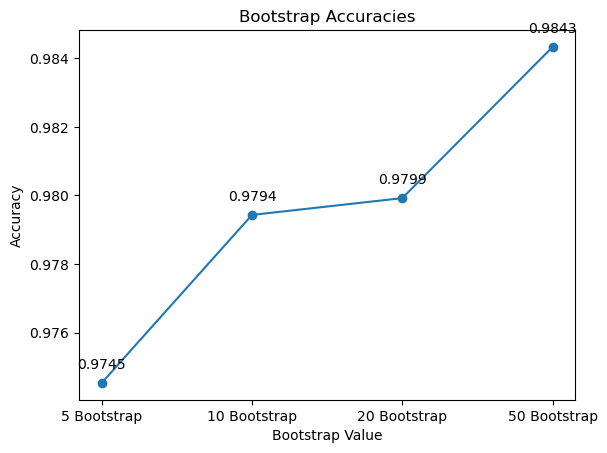

In [13]:
# draw the graph
x = ['5 Bootstrap', '10 Bootstrap', '20 Bootstrap', '50 Bootstrap']

plt.plot(x, scores, marker='o', linestyle='-')
for i, (x_val, y_val) in enumerate(zip(x, scores)):
    plt.annotate(f"{y_val:.4f}", (x_val, y_val), textcoords="offset points", xytext=(0, 10), ha='center')

# graph
plt.xlabel("Bootstrap Value")
plt.ylabel("Accuracy")
plt.title("Bootstrap Accuracies")
plt.show()

#### How the results are changing with different sample numbers?

So, our the best bootstrap method is 50-bootstrap one. Because its output has the best accuracy rate. We can say our accuracy is increasing when the bootstrap number increases.

So, we have just one step to finish this part of this project. Let's code <code>bagging classifier</code> again from its starting point.

In [14]:
# majority vote
def majority_vote(estimators, X):
    predictions = np.array([est.predict(X) for est in estimators]).T
    return np.array([np.bincount(row).argmax() for row in predictions])

# bootstrap for bagging
def bootstrap_sample(X, y):
    n_samples = X.shape[0]
    idxs = np.random.choice(n_samples, size=n_samples, replace=True)
    return X.iloc[idxs], y[idxs]

# bagging
n_estimators = 50
estimators = []
for _ in range(n_estimators):
    X_boot, y_boot = bootstrap_sample(x_train_data, y_train_data)
    estimator = DecisionTreeClassifier()
    estimator.fit(X_boot, y_boot)
    estimators.append(estimator)

# evaluation
train_preds = majority_vote(estimators, x_train_data)
test_preds = majority_vote(estimators, x_test_data)

train_score_bagging3 = np.mean(train_preds == y_train_data)
test_score_bagging3 = np.mean(test_preds == y_test_data)

print(f"Train Accuracy: {train_score_bagging3:.3f}")
print(f"Test Accuracy: {test_score_bagging3:.3f}")

Train Accuracy: 1.000
Test Accuracy: 0.985


As you can see, we coded the <code>bagging classifier</code> from its starting to ending point. After that, we have got the accuracy values on both datasets. Let's continue to our next machine learning algorithm.

## Random Forest

We will use 50 features and train a <code>Random Forest</code> with 50 decision trees here. After that we will print accuracies and see our performance for this classifier.

In [15]:
# random forest
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=50, max_features=50, random_state=42)
rf_clf.fit(x_train_data, y_train_data)

# evaluate the performance
train_accuracy_rf = accuracy_score(y_train_data, rf_clf.predict(x_train_data))
test_accuracy_rf = accuracy_score(y_test_data, rf_clf.predict(x_test_data))

print(f"Train Accuracy: {train_accuracy_rf:.3f}")
print(f"Test Accuracy: {test_accuracy_rf:.3f}")

Train Accuracy: 1.000
Test Accuracy: 0.989


Right now, we will create a random forest classifier from its starting point to its ending point. We will train a <code>Random Forest</code> with 50 samples. Let's start.

In [16]:
# 50 clusters
selected_features_list = []
for i in range(50):
  selected_features = np.random.choice(x_train_data.columns, 50, replace=False)
  selected_features_list.append(selected_features)

# random forest creation
rf_model = RandomForestClassifier(n_estimators=50)

# train and predictions
accuracy_scores = []
for selected_features in selected_features_list:
  X_train_subset = x_train_data[selected_features]
  X_test_subset = x_test_data[selected_features]

  rf_model.fit(X_train_subset, y_train_data)
  y_pred = rf_model.predict(X_test_subset)
  accuracy = np.mean(y_pred == y_test_data)
  accuracy_scores.append(accuracy)

# average accuracy
average_accuracy_rf2 = np.mean(accuracy_scores)

# print
print("Test Accuracy:", average_accuracy_rf2)

Test Accuracy: 0.9544466209598432


So, the time has come for comparing these <code>Random Forest Classifier's</code> accuracies.

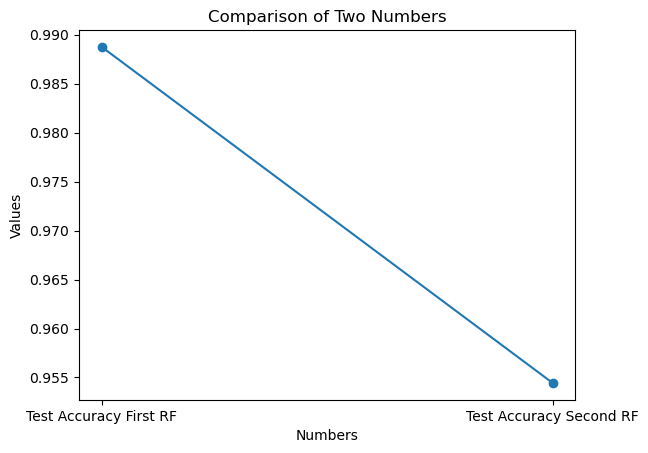

In [18]:
# numbers
x = ['Test Accuracy First RF', 'Test Accuracy Second RF']
y = [test_accuracy_rf, average_accuracy_rf2]

# create graph
plt.plot(x, y, marker='o', linestyle='-')
plt.xlabel('Numbers')
plt.ylabel('Values')
plt.title('Comparison of Two Numbers')
plt.show()

At the moment, we can say first <code>Random Forest</code> model is better. It means that when we talk about RF, we can continue with our first RF classifier model.

## AdaBoost with 50 Trees

In this part, we will train an <code>AdaBoost</code> model with 50 trees. Let's start and print its accuracy values.

In [19]:
# import
from sklearn.ensemble import AdaBoostClassifier

# adaboost
ada_clf = AdaBoostClassifier(n_estimators=50)

# train and predictions
ada_clf.fit(x_train_data, y_train_data)
y_train_pred = ada_clf.predict(x_train_data)
y_test_pred = ada_clf.predict(x_test_data)

# performance evaluation
train_accuracy_adaboost = accuracy_score(y_train_data, y_train_pred)
test_accuracy_adaboost = accuracy_score(y_test_data, y_test_pred)

print("Train Accuracy:", train_accuracy_adaboost)
print("Test Accuracy:", test_accuracy_adaboost)

Train Accuracy: 0.9689800645214658
Test Accuracy: 0.9622918707149853


Right now, we will lower the depth and use the same number of trees. Our aim is reducing the <code>overfitting</code>. Let's start.

In [20]:
# adaboost classifier with 2 depth, 50 trees
ada_clf_shallow = AdaBoostClassifier(n_estimators=50, estimator=DecisionTreeClassifier(max_depth=2))

# train and predictions
ada_clf_shallow.fit(x_train_data, y_train_data)
y_train_pred_shallow = ada_clf_shallow.predict(x_train_data)
y_test_pred_shallow = ada_clf_shallow.predict(x_test_data)

# accuracies
train_accuracy_shallow = accuracy_score(y_train_data, y_train_pred_shallow)
test_accuracy_shallow = accuracy_score(y_test_data, y_test_pred_shallow)

print("Train Accuracy for Shallow Trees:", train_accuracy_shallow)
print("Test Accuracy for Shallow Trees:", test_accuracy_shallow)

# last adaboost models evaluation
print("-" * 50)
print("Train Accuracy for Deep Trees:", train_accuracy_adaboost)
print("Test Accuracy for Deep Trees:", test_accuracy_adaboost)

Train Accuracy for Shallow Trees: 0.9969393663661179
Test Accuracy for Shallow Trees: 0.9853085210577864
--------------------------------------------------
Train Accuracy for Deep Trees: 0.9689800645214658
Test Accuracy for Deep Trees: 0.9622918707149853


As you can see, <code>shallow trees</code> have higher performance than <code>deep trees</code>. Because when we lowered the depth, we reduced the risk of <code>overfitting</code>.

Here, we finished training-model part of the project. Right now, we will compare our models. Let's continue.

## Comparison of Models

So, we finished with models. In this part, we will compare <code>test accuracy performance</code> of models and select the best one for the future projects. Let's start.

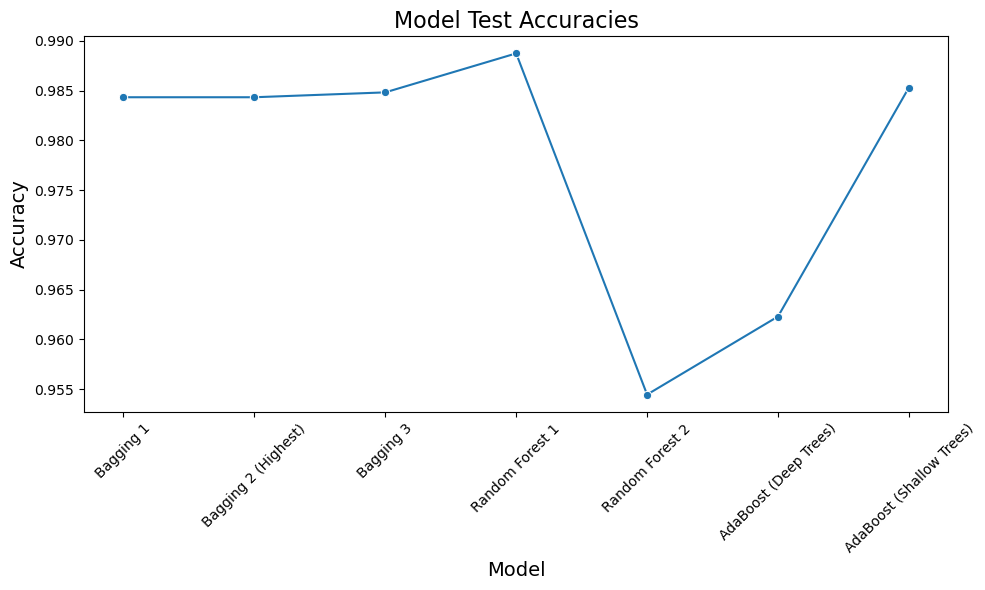

In [21]:
# import
import seaborn as sns

# datas
variables = ['Bagging 1', 'Bagging 2 (Highest)', 'Bagging 3', 'Random Forest 1', 'Random Forest 2',
             'AdaBoost (Deep Trees)', 'AdaBoost (Shallow Trees)']
accuracies = [test_accuracy_bagging, scores[3], test_score_bagging3,
              test_accuracy_rf, average_accuracy_rf2, test_accuracy_adaboost, test_accuracy_shallow]

# graph
plt.figure(figsize=(10, 6))
sns.lineplot(x=variables, y=accuracies, marker='o')
plt.xticks(rotation=45)
plt.title('Model Test Accuracies', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.tight_layout()
plt.show()

As you can see above, the best model is <code>Random Forest 1</code>. So, we can use this model projects like this in the future.

##### How does changing model complexity affect the performance of bagging and reinforcement methods?

We can barely see it with the graph above. We are nearly the same with our <code>bagging</code> models, our <code>normal random forest</code> model is useful for this part. <code>AdaBoost</code> is wonderful with its shallow trees.

Firstly, because of the same scores from <code>Bagging 1 and 2</code>, they are the same. And for <code>Bagging 3</code>, only difference is it coded by us.

Secondly, <code>Random Forest 1</code> is the best. We have <code>m = 50</code> parameter in <code>Random Forest 2</code>, without this we are better. <code>Random Forest 1</code> also our the best model.

And finally, our <code>AdaBoost with Shallow Trees</code> is better than <code>AdaBoost with Deep Trees</code>. Our aim for creating <code>Shallow AdaBoost</code> is reducing overfitting, and it gave the best accuracy. We reduced depth of tree in this part. So, reducing it affect our performance in a good way.

Overall, according to this output, the bagging and <code>Random Forest</code> algorithms were not affected much by the complexity of the base classifiers, while <code>AdaBoost</code> performed better with shallow trees.

So, this project reached its bottom part. This project will help the future ones.